In [1]:
!pip install pandas


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel('Strikers_performance.xlsx')
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
0,1,Spain,Left-footed,No,17.483571,10.778533,34.795488,0.677836,0.166241,0.757061,50.921924,71.806409,15.682532,30.412215,6.152481,0.820314,0.922727,8.570370,11.451388
1,2,France,Left-footed,Yes,14.308678,13.728250,31.472436,0.544881,0.192774,0.796818,61.396150,53.726866,19.843983,26.474913,6.093172,0.803321,0.678984,3.444638,8.243689
2,3,Germany,Left-footed,No,18.238443,3.804297,25.417413,0.518180,0.160379,0.666869,65.863945,60.452227,20.090084,24.164116,3.408714,0.766540,0.843858,8.429491,9.506835
3,4,France,Right-footed,No,22.615149,9.688908,20.471443,0.599663,0.184602,0.638776,88.876877,60.511979,22.363152,44.129989,6.339820,0.611798,0.662997,6.532552,8.199653
4,5,France,Left-footed,Yes,13.829233,6.048072,29.887563,0.582982,0.105319,0.591485,75.565531,54.982158,13.165708,37.859323,8.465658,0.701638,0.906538,8.414915,6.665333


In [4]:
#DATA CLEANING

In [5]:
missing_data = data.isnull().sum()
print('Missing data: ')
missing_data

Missing data: 


Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         6
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          2
Consistency                   0
Penalty Success Rate          5
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
imputer = SimpleImputer(strategy='median')
imputer.fit(data[['Movement off the Ball','Big Game Performance','Penalty Success Rate']])
data[['Movement off the Ball','Big Game Performance','Penalty Success Rate']] = imputer.transform(data[['Movement off the Ball','Big Game Performance','Penalty Success Rate']])

In [8]:
missing_data = data.isnull().sum()
print("Missing data: ")
missing_data

Missing data: 


Striker_ID                    0
Nationality                   0
Footedness                    0
Marital Status                0
Goals Scored                  0
Assists                       0
Shots on Target               0
Shot Accuracy                 0
Conversion Rate               0
Dribbling Success             0
Movement off the Ball         0
Hold-up Play                  0
Aerial Duels Won              0
Defensive Contribution        0
Big Game Performance          0
Consistency                   0
Penalty Success Rate          0
Impact on Team Performance    0
Off-field Conduct             0
dtype: int64

In [9]:
data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                  float64
Assists                       float64
Shots on Target               float64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball         float64
Hold-up Play                  float64
Aerial Duels Won              float64
Defensive Contribution        float64
Big Game Performance          float64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance    float64
Off-field Conduct             float64
dtype: object

In [10]:
cols = [
    'Goals Scored', 'Assists', 'Shots on Target', 'Movement off the Ball',
    'Hold-up Play', 'Aerial Duels Won', 'Defensive Contribution',
    'Big Game Performance', 'Impact on Team Performance', 'Off-field Conduct'
]

data[cols] = data[cols].astype('int64')

In [12]:
data.dtypes

Striker_ID                      int64
Nationality                    object
Footedness                     object
Marital Status                 object
Goals Scored                    int64
Assists                         int64
Shots on Target                 int64
Shot Accuracy                 float64
Conversion Rate               float64
Dribbling Success             float64
Movement off the Ball           int64
Hold-up Play                    int64
Aerial Duels Won                int64
Defensive Contribution          int64
Big Game Performance            int64
Consistency                   float64
Penalty Success Rate          float64
Impact on Team Performance      int64
Off-field Conduct               int64
dtype: object

In [13]:
#DESCRIPTIVE ANALYSIS

In [14]:
round(data.describe(),2)

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,250.50,14.52,7.60,25.26,0.60,0.20,0.70,69.28,59.33,19.04,39.47,6.43,0.74,0.80,6.52,7.57
std,144.48,4.91,2.96,7.08,0.10,0.05,0.10,10.33,10.15,4.95,9.90,1.98,0.10,0.10,2.11,2.09
min,1.00,0.00,0.00,4.00,0.31,0.05,0.40,40.00,35.00,4.00,8.00,2.00,0.46,0.53,0.00,0.00
25%,125.75,11.00,6.00,20.00,0.54,0.17,0.64,62.00,52.00,16.00,33.00,5.00,0.68,0.72,5.00,6.00
50%,250.50,15.00,8.00,25.00,0.60,0.20,0.70,69.00,60.00,19.00,39.50,6.00,0.75,0.80,6.50,8.00
75%,375.25,18.00,9.00,30.00,0.67,0.23,0.76,76.00,66.00,22.00,46.00,8.00,0.81,0.87,8.00,9.00
max,500.00,34.00,15.00,43.00,0.92,0.36,1.00,98.00,92.00,34.00,71.00,12.00,1.00,1.00,13.00,13.00


In [15]:
#DATA VISUALIZATION

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
fre_footedness = data['Footedness'].value_counts()

In [19]:
fre_footedness

Footedness
Right-footed    267
Left-footed     233
Name: count, dtype: int64

In [23]:
perc_footedness = fre_footedness / len(data['Footedness']) * 100

In [24]:
perc_footedness

Footedness
Right-footed    53.4
Left-footed     46.6
Name: count, dtype: float64

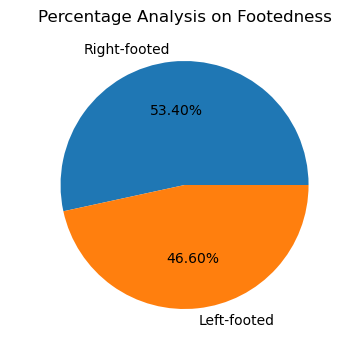

In [25]:
plt.figure(figsize = (4,6))
perc_footedness.plot(kind ='pie', autopct = '%1.2f%%')
plt.title('Percentage Analysis on Footedness')
plt.ylabel(' ')
plt.show()

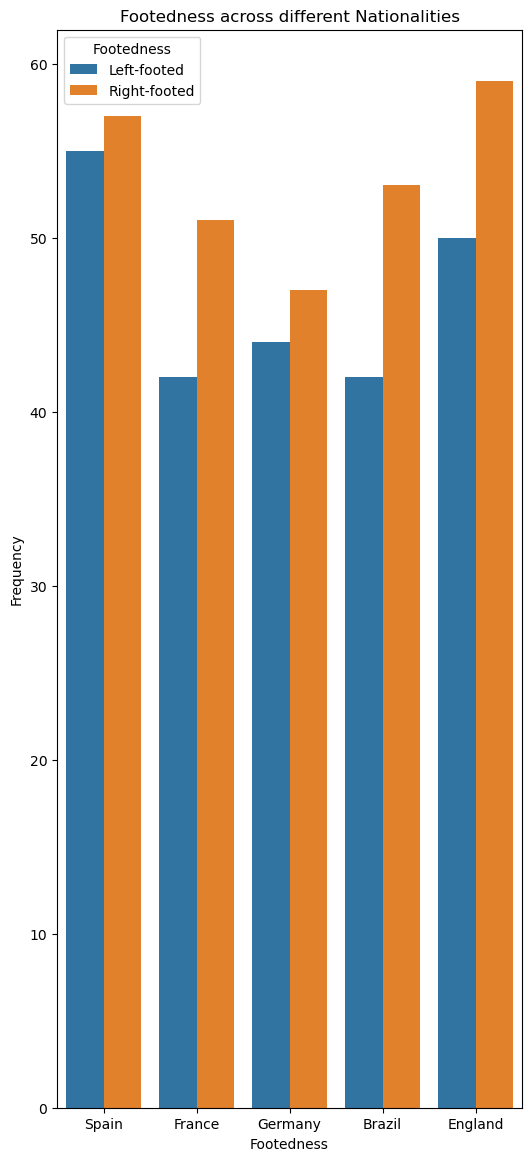

In [53]:
plt.figure(figsize=(6,14))
sns.countplot(x = 'Nationality', hue = 'Footedness', data = data)
plt.title('Footedness across different Nationalities')
plt.xlabel('Footedness')
plt.ylabel('Frequency')
plt.show()

In [87]:
num_variables = data.select_dtypes(include = ['number']).columns

correl_matrix = round(data[num_variables].corr(), 3)
correl_matrix

,Striker_ID,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct
Striker_ID,1.000,0.025,0.066,0.003,0.018,0.047,-0.031,0.060,-0.036,0.016,0.012,-0.052,-0.017,-0.006,-0.027,0.103
Goals Scored,0.025,1.000,-0.071,-0.059,0.066,-0.011,0.034,0.016,0.003,-0.047,0.014,-0.004,0.045,-0.021,0.103,-0.053
Assists,0.066,-0.071,1.000,0.072,-0.020,0.028,0.050,0.011,-0.046,0.001,-0.011,0.026,-0.007,-0.081,-0.022,-0.015
Shots on Target,0.003,-0.059,0.072,1.000,-0.021,-0.044,0.010,-0.062,-0.102,-0.068,0.011,0.039,0.049,0.029,0.025,0.055
Shot Accuracy,0.018,0.066,-0.020,-0.021,1.000,-0.088,0.023,-0.018,-0.044,0.012,0.027,-0.019,0.005,0.017,0.041,0.084
Conversion Rate,0.047,-0.011,0.028,-0.044,-0.088,1.000,-0.020,0.038,0.059,0.059,-0.002,0.037,0.031,-0.049,-0.031,-0.004
Dribbling Success,-0.031,0.034,0.050,0.010,0.023,-0.020,1.000,-0.056,0.002,-0.072,0.015,-0.059,-0.030,-0.054,-0.012,-0.060
Movement off the Ball,0.060,0.016,0.011,-0.062,-0.018,0.038,-0.056,1.000,-0.057,0.013,-0.006,-0.075,-0.030,-0.071,-0.046,-0.035
Hold-up Play,-0.036,0.003,-0.046,-0.102,-0.044,0.059,0.002,-0.057,1.000,0.080,0.029,-0.031,0.147,0.068,-0.046,0.035
Aerial Duels Won,0.016,-0.047,0.001,-0.068,0.012,0.059,-0.072,0.013,0.080,1.000,-0.025,-0.013,0.047,-0.002,0.043,0.004


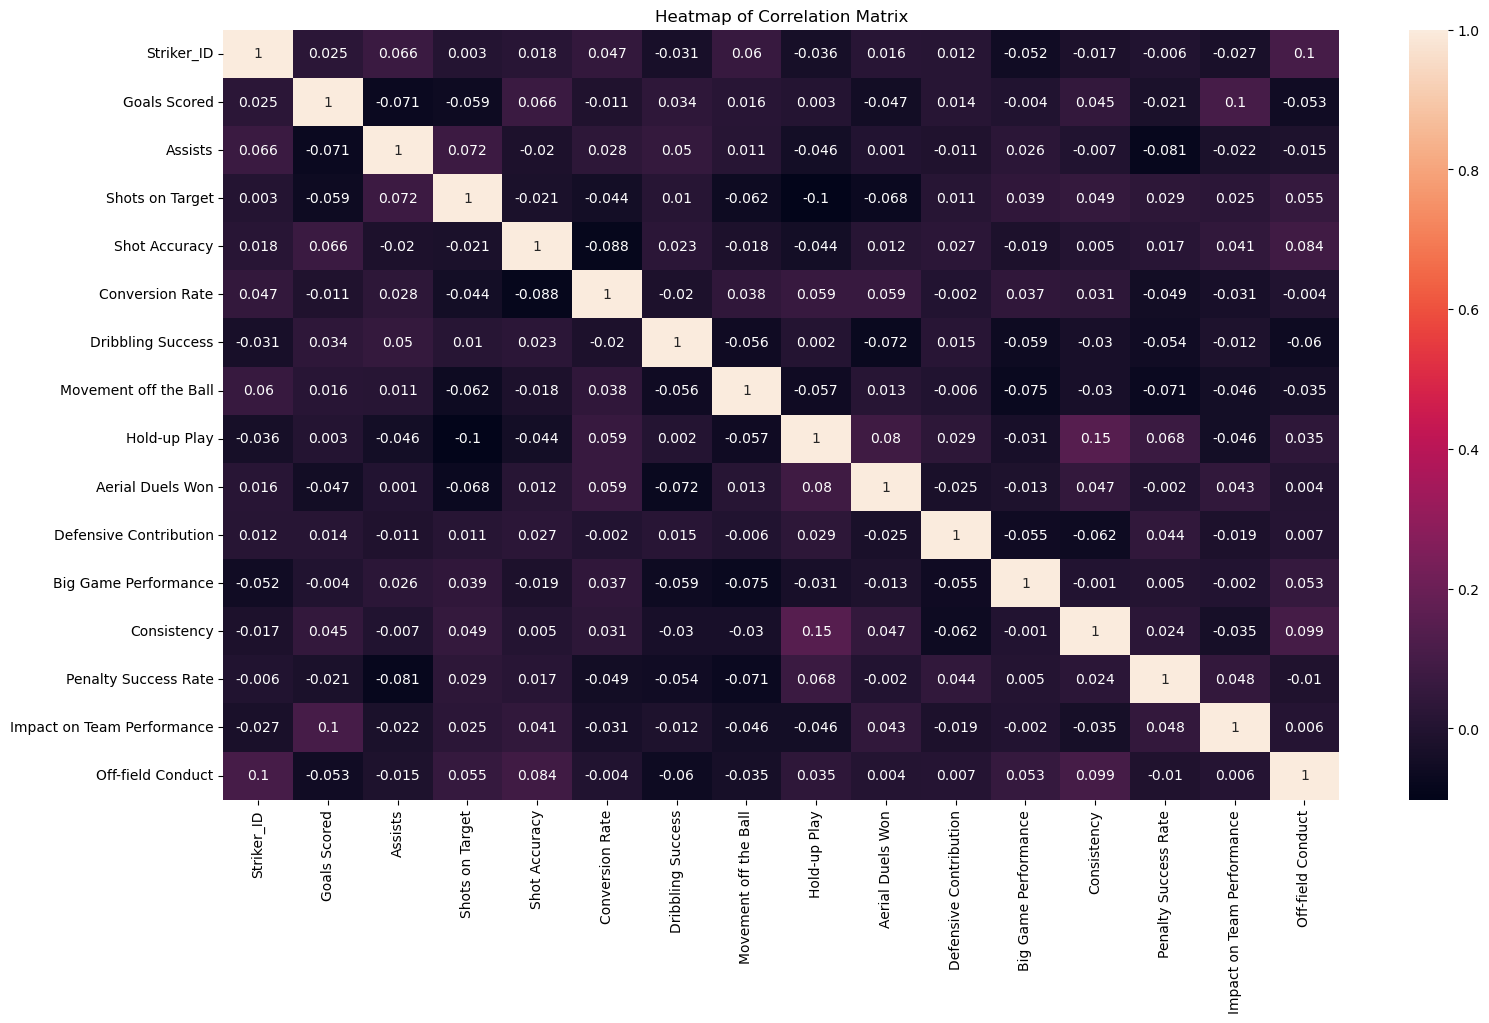

In [89]:
plt.figure(figsize=(18, 10))
sns.heatmap(correl_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [55]:
#STATISTICAL ANALYSIS

In [57]:
max_score = data['Goals Scored'].max()

In [59]:
max_score

34

In [61]:
cross_tab = pd.crosstab(data['Nationality'],data['Footedness']) 

In [63]:
cross_tab

Footedness,Left-footed,Right-footed
Nationality,,
Brazil,42,53
England,50,59
France,42,51
Germany,44,47
Spain,55,57


In [65]:
avg_goal_score = data.groupby('Nationality')['Goals Scored'].mean()

In [67]:
avg_goal_score

Nationality
Brazil     15.315789
England    13.899083
France     14.408602
Germany    14.351648
Spain      14.687500
Name: Goals Scored, dtype: float64

In [69]:
avg_conv_rates = data.groupby('Footedness')['Conversion Rate'].mean()

In [71]:
avg_conv_rates

Footedness
Left-footed     0.198086
Right-footed    0.200592
Name: Conversion Rate, dtype: float64

In [73]:
from scipy.stats import shapiro

In [75]:
from scipy import stats

In [77]:
from scipy.stats import levene

In [79]:
unique_nation = data['Nationality'].unique()
unique_nation

array(['Spain', 'France', 'Germany', 'Brazil', 'England'], dtype=object)

In [81]:
Spain = data.query('Nationality == "Spain"')['Consistency']
France = data.query('Nationality == "France"')['Consistency']
Germany = data.query('Nationality == "Germany"')['Consistency']
Brazil = data.query('Nationality == "Brazil"')['Consistency']
England = data.query('Nationality == "England"')['Consistency']

In [91]:
stat,p_value = shapiro(data['Consistency'])
print(round(p_value,3))

0.451


In [93]:
stat,p_value =levene(Spain, France, Germany, Brazil, England)
print(round(p_value,3))

0.808


In [95]:
t_stat, p_value = stats.f_oneway(Spain, France, Germany, Brazil, England)
print('P_value: ',p_value)

if p_value < 0.05:
    print('Reject null hypothesis')
    print('there is a significant difference in consistency rates among strikers from various nationalities')
else:
    print('Fail to reject null hypothesis')
    print('there is no significant difference in consistency rates among strikers from various nationalities')

P_value:  0.19278675901599154
Fail to reject null hypothesis
there is no significant difference in consistency rates among strikers from various nationalities


In [97]:
from scipy.stats import pearsonr

In [99]:
stat,p_value = shapiro(data['Hold-up Play'])
print(round(p_value,3))

0.151


In [101]:
stat,p_value = shapiro(data['Consistency'])
print(round(p_value,3))

0.451


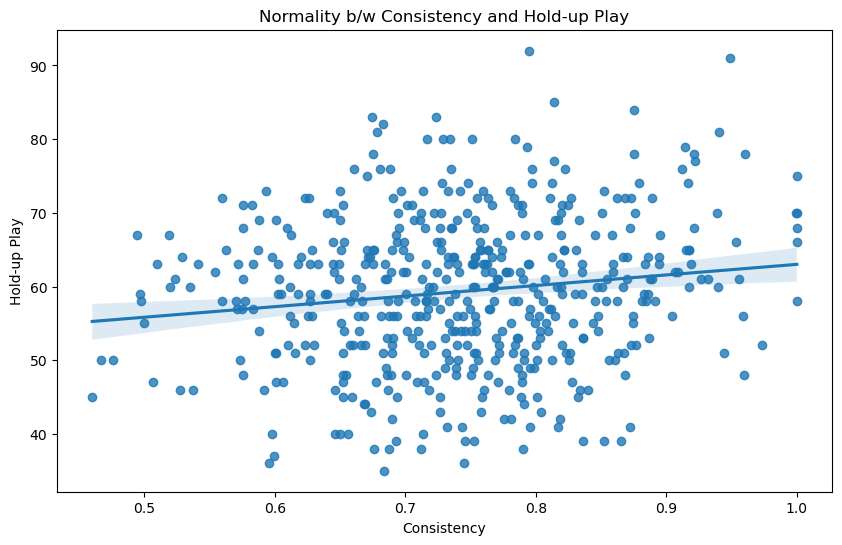

In [107]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Consistency', y = 'Hold-up Play', data = data)
plt.title('Normality b/w Consistency and Hold-up Play')
plt.xlabel('Consistency')
plt.ylabel('Hold-up Play')
plt.show()

In [115]:
Consistency = data['Consistency']
Hold_up_play = data['Hold-up Play']

corr,p_value = pearsonr(Hold_up_play,Consistency)
print(f'P_value: {round(corr,3)}')
print(f'Correlation:{round(corr,3)}')

if p_value < 0.05:
    print('Reject null hypothesis')
    print("there is a significant correlation between strikers' Hold-up play and consistency rate")
else:
    print('Fail to reject null hypothesis')
    print("there is no significant correlation between strikers' Hold-up play and consistency rate")

P_value: 0.147
Correlation:0.147
Reject null hypothesis
there is a significant correlation between strikers' Hold-up play and consistency rate


In [117]:
import statsmodels.api as sm

In [118]:
x = data['Hold-up Play']
y = data['Consistency']

x_const = sm.add_constant(x)
model = sm.OLS(y,x_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consistency   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.93
Date:                Mon, 10 Nov 2025   Prob (F-statistic):            0.00101
Time:                        20:25:13   Log-Likelihood:                 429.97
No. Observations:                 500   AIC:                            -855.9
Df Residuals:                     498   BIC:                            -847.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6548      0.027     24.031   

In [119]:
#FEATURE ENGINEERING

In [123]:
data['Total_contribution_score'] = (data['Goals Scored'] + data['Assists'] + data['Shots on Target']+ data['Dribbling Success'] +
data['Aerial Duels Won'] + data['Defensive Contribution'] + data['Big Game Performance'] + data['Consistency']) 

In [125]:
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_contribution_score
0,1,Spain,Left-footed,No,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,Left-footed,Yes,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,Left-footed,No,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,Right-footed,No,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,Left-footed,Yes,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


In [127]:
from sklearn.preprocessing import LabelEncoder

In [129]:
encoder = LabelEncoder()
data['Marital Status'] = encoder.fit_transform(data['Marital Status'])
data['Footedness'] = encoder.fit_transform(data['Footedness'])

In [131]:
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,Hold-up Play,Aerial Duels Won,Defensive Contribution,Big Game Performance,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_contribution_score
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,50,71,15,30,6,0.820314,0.922727,8,11,113.577376
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,61,53,19,26,6,0.803321,0.678984,3,8,110.600139
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,65,60,20,24,3,0.766540,0.843858,8,9,94.433410
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,88,60,22,44,6,0.611798,0.662997,6,8,124.250575
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,75,54,13,37,8,0.701638,0.906538,8,6,107.293123


In [133]:
dummies = pd.get_dummies(data[['Nationality']]).astype('int64')
data = pd.concat([data,dummies], axis=1)

In [135]:
data.head()

,Striker_ID,Nationality,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_contribution_score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,1,Spain,0,0,17,10,34,0.677836,0.166241,0.757061,...,0.820314,0.922727,8,11,113.577376,0,0,0,0,1
1,2,France,0,1,14,13,31,0.544881,0.192774,0.796818,...,0.803321,0.678984,3,8,110.600139,0,0,1,0,0
2,3,Germany,0,0,18,3,25,0.518180,0.160379,0.666869,...,0.766540,0.843858,8,9,94.433410,0,0,0,1,0
3,4,France,1,0,22,9,20,0.599663,0.184602,0.638776,...,0.611798,0.662997,6,8,124.250575,0,0,1,0,0
4,5,France,0,1,13,6,29,0.582982,0.105319,0.591485,...,0.701638,0.906538,8,6,107.293123,0,0,1,0,0


In [137]:
data = data.drop(columns=['Nationality'], axis=1)

In [139]:
data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Consistency,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_contribution_score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.820314,0.922727,8,11,113.577376,0,0,0,0,1
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.803321,0.678984,3,8,110.600139,0,0,1,0,0
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.766540,0.843858,8,9,94.433410,0,0,0,1,0
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.611798,0.662997,6,8,124.250575,0,0,1,0,0
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.701638,0.906538,8,6,107.293123,0,0,1,0,0


In [147]:
x = data.drop(columns=['Striker_ID'], axis=1)

In [149]:
from sklearn.cluster import KMeans

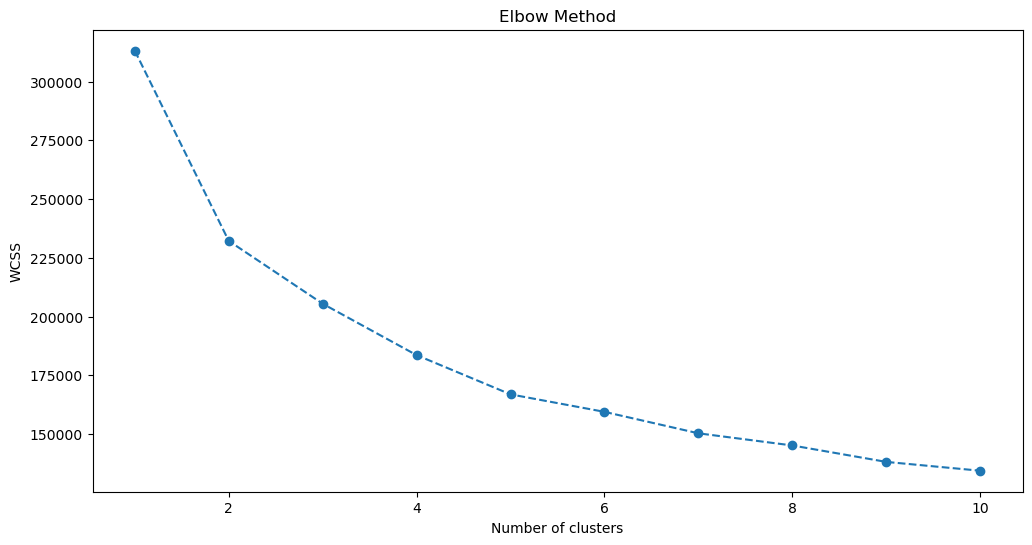

In [153]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

wcss = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  

plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [155]:
final_km = KMeans(n_clusters = 2)
final_km.fit(x)


labels = final_km.labels_
labels

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,

In [157]:
data['Clusters'] = labels
data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_contribution_score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Clusters
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,0,0,0,0,1,1
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,0,0,1,0,0,1
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,0,0,0,1,0,1
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,0,0,1,0,0,0
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,0,0,1,0,0,1


In [161]:
round(data.groupby('Clusters')['Total_contribution_score'].mean(), 2)

Clusters
0    123.35
1    101.85
Name: Total_contribution_score, dtype: float64

In [163]:
mapping = {0:'Best strikers', 1:'Regular strikers'}
data['Strikers types'] = data['Clusters'].map(mapping)

In [165]:
data = data.drop('Clusters', axis = 1)
data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_contribution_score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Strikers types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,0,0,0,0,1,Regular strikers
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,0,0,1,0,0,Regular strikers
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,0,0,0,1,0,Regular strikers
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,0,0,1,0,0,Best strikers
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,0,0,1,0,0,Regular strikers


In [167]:
mapping = {'Best strikers':1, 'Regular strikers': 0}
data['Strikers types'] = data['Strikers types'].map(mapping)
data.head()

,Striker_ID,Footedness,Marital Status,Goals Scored,Assists,Shots on Target,Shot Accuracy,Conversion Rate,Dribbling Success,Movement off the Ball,...,Penalty Success Rate,Impact on Team Performance,Off-field Conduct,Total_contribution_score,Nationality_Brazil,Nationality_England,Nationality_France,Nationality_Germany,Nationality_Spain,Strikers types
0,1,0,0,17,10,34,0.677836,0.166241,0.757061,50,...,0.922727,8,11,113.577376,0,0,0,0,1,0
1,2,0,1,14,13,31,0.544881,0.192774,0.796818,61,...,0.678984,3,8,110.600139,0,0,1,0,0,0
2,3,0,0,18,3,25,0.518180,0.160379,0.666869,65,...,0.843858,8,9,94.433410,0,0,0,1,0,0
3,4,1,0,22,9,20,0.599663,0.184602,0.638776,88,...,0.662997,6,8,124.250575,0,0,1,0,0,1
4,5,0,1,13,6,29,0.582982,0.105319,0.591485,75,...,0.906538,8,6,107.293123,0,0,1,0,0,0


In [171]:
x = data.drop(['Striker_ID', 'Strikers types'], axis = 1)
y = data['Strikers types']

In [205]:
from sklearn.preprocessing import StandardScaler

In [207]:
scaler = StandardScaler()

In [209]:
scaled_x = scaler.fit_transform(x)
scaled_x

array([[-1.07047781, -1.03252879,  0.5050467 , ..., -0.47801802,
        -0.47169258,  1.86125917],
       [-1.07047781,  0.968496  , -0.10638998, ...,  2.09197134,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879,  0.70885893, ..., -0.47801802,
         2.12002488, -0.53727069],
       ...,
       [-1.07047781,  0.968496  , -0.10638998, ..., -0.47801802,
        -0.47169258, -0.53727069],
       [ 0.93416229,  0.968496  , -0.9216389 , ..., -0.47801802,
        -0.47169258, -0.53727069],
       [-1.07047781, -1.03252879, -1.32926335, ..., -0.47801802,
        -0.47169258, -0.53727069]])

In [211]:
from sklearn.model_selection import train_test_split

In [213]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 42)

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [217]:
lgr_model = LogisticRegression()
lgr_model.fit(x_train, y_train)

y_lgr_pred = lgr_model.predict(x_test)

accuracy_lgr = accuracy_score(y_test, y_lgr_pred)
print(accuracy_lgr*100,'%')

96.0 %


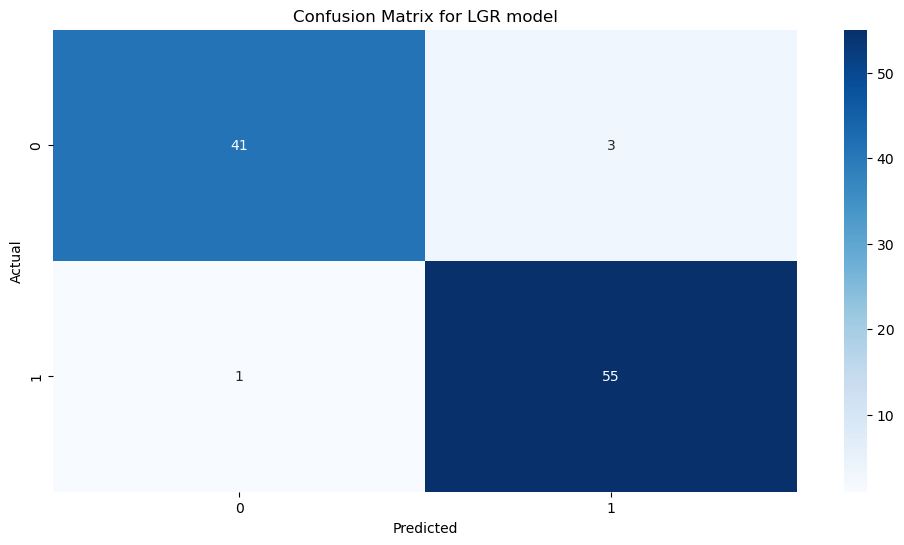

In [219]:
conf_matrix_lgr = confusion_matrix(y_test, y_lgr_pred)

plt.figure(figsize = (12, 6))
sns.heatmap(conf_matrix_lgr, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix for LGR model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()